In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Plotting a image

In [3]:
import matplotlib
import matplotlib.pyplot as plt

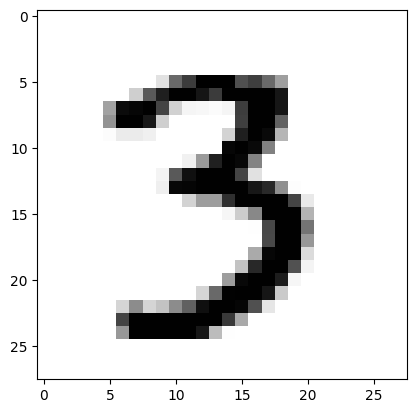

In [4]:
image = x_train[10000]
image.reshape(28, 28)

plt.imshow(image, cmap = matplotlib.cm.binary, interpolation = "nearest")

## Normalizing the values

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
from tensorflow.keras.utils import to_categorical

x_train.reshape(-1, 28, 28, 1)
x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Seperating Validation Data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

## Model Building

In [9]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Input
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential([
    Input(shape = (28, 28, 1)),
    Conv2D(32, kernel_size = (3, 3), activation = "relu"),
    MaxPooling2D(pool_size = (2, 2)),

    Conv2D(64, kernel_size = (3, 3), activation = "relu"),
    MaxPooling2D(pool_size = (2, 2)),

    Flatten(),
    Dense(128, activation = "relu"),
    Dense(10, activation = "softmax")
    ]
)

In [11]:
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"]
             )

In [12]:
model.fit(x_train, y_train, validation_data = (x_val, y_val), batch_size = 64)

844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 39ms/step - accuracy: 0.8853 - loss: 0.3876 - val_accuracy: 0.9808 - val_loss: 0.0641


## Tuning the Model

In [13]:
import keras_tuner as kt

In [20]:
def build_model(hp):
    new_model = Sequential()
    new_model.add(Input(shape = (28, 28, 1)))
    
    new_model.add(Conv2D(filters = hp.Int("filter1", 32, 64, step = 16),
                    kernel_size = (3, 3),
                    activation = 'relu'))
    new_model.add(MaxPooling2D(pool_size = (2, 2)))
    
    new_model.add(Conv2D(filters = hp.Int('filter2', 32, 64, step = 16),
                        kernel_size = (3, 3),
                        activation = 'relu'))
    new_model.add(Flatten())
    new_model.add(Dense(units = hp.Int('dense_units', 64, 128, step = 32),
                   activation = 'relu'))
    new_model.add(Dense(10, activation = 'softmax'))

    new_model.compile(optimizer = "adam",
                  loss = "categorical_crossentropy",
                  metrics = ['accuracy']
                 )
    return new_model
    

In [21]:
import shutil
shutil.rmtree('untitled_project')

In [22]:
tuner = kt.RandomSearch(build_model,
                       objective = 'val_accuracy',
                       max_trials = 5)

In [23]:
tuner.search(x_train, y_train, validation_data = (x_val, y_val), epochs = 5)

Trial 5 Complete [00h 05m 04s]
val_accuracy: 0.9884999990463257

Best val_accuracy So Far: 0.9903333187103271
Total elapsed time: 00h 21m 21s


In [26]:
best_model = tuner.get_best_models(num_models = 1)[0]
best_model.compile(optimizer = 'adam',
                   loss = "categorical_crossentropy",
                   metrics = ['accuracy']
                  )

C:\Users\Adesh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Testing on test data

In [27]:
loss, accuracy = best_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9888 - loss: 0.0374


In [28]:
accuracy

0.9908000230789185

## Saving the model

In [32]:
best_model.save('Digit Classifier.keras')